# Social Network Clustering: Real vs. Random

How different is a social network from a random network? Let's find out!

This assignment is completed in the Discrete Math and Analyzing Social Graphs course in the Mathematics for Data Science specialization on Coursera.
https://www.coursera.org/learn/discrete-math-and-analyzing-social-graphs

### Task 1: Read graph from SNAP dataset

Import Python libraries.

In [1]:
import networkx as nx
import matplotlib.pyplot as plt
import pandas as pd
import random

In [2]:
G_fb = nx.read_edgelist("facebook_combined.txt", create_using = nx.Graph(), nodetype = int)
print('Graph created!')

Graph created!


Visualize the graph.

Text(0.5, 1.0, 'Facebook Social Network Graph')

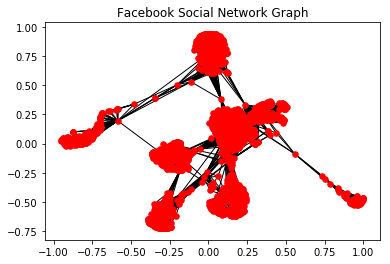

In [3]:
nx.draw_networkx(G_fb, with_labels = False, node_size = 30)
plt.title('Facebook Social Network Graph')

The nodes look highly clustered in the graph.

### Task 2: Calculate average clustering coefficient (ACC)

In [4]:
acc_fb = nx.average_clustering(G_fb)
print('Average clustering coefficient = ' + str(acc_fb))

Average clustering coefficient = 0.6055467186200876


### Task 3: Calculate edge probability of any two nodes

Show the number of nodes.

In [5]:
nodes_fb = G_fb.number_of_nodes()
print('Nodes = ' + str(nodes_fb))

Nodes = 4039


Show the number of edges.

In [6]:
edges_fb = G_fb.number_of_edges()
print('Edges = ' + str(edges_fb))

Edges = 88234


Calculate the number of possible edges, given by the formula n(n-1)/2, where n is the number of nodes.

In [8]:
possible_edges = int(nodes_fb * (nodes_fb - 1) / 2)
print('Possible edges = ' + str(possible_edges))

Possible edges = 8154741


In [11]:
edge_prob = edges_fb / possible_edges
print('Edge probability = ' + str(edge_prob))

Edge probability = 0.010819963503439287


Calculate the diameter.

In [13]:
diameter_fb = nx.diameter(G_fb)
print('Diameter = ' + str(diameter_fb))

Diameter = 8


### Task 4: Generate Erdős–Rényi random graph

Create a random graph using the same number of nodes and the edge probability of the Facebook social network graph.

In [15]:
random.seed(123)
G_rand = nx.erdos_renyi_graph(nodes_fb, edge_prob)
print('Graph created!')

Graph created!


Visualize the graph.

Text(0.5, 1.0, 'Erdős–Rényi Random Graph')

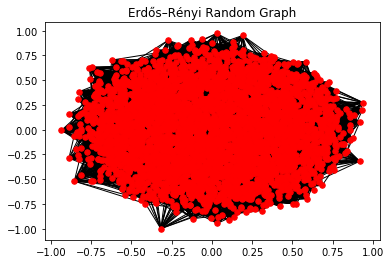

In [16]:
nx.draw_networkx(G_rand, with_labels = False, node_size = 30)
plt.title('Erdős–Rényi Random Graph')

The nodes look highly spread out in the graph.

Calculate the number of nodes.

In [17]:
nodes_rand = G_rand.number_of_nodes()
print('Nodes = ' + str(nodes_rand))

Nodes = 4039


Calculate the number of edges

In [18]:
edges_rand = G_rand.number_of_edges()
print('Edges = ' + str(edges_rand))

Edges = 88736


### Task 5: Calculate average clustering coefficient (ACC)

In [19]:
acc_rand = nx.average_clustering(G_rand)
print('Average clustering coefficient = ' + str(acc_rand))

Average clustering coefficient = 0.010871604212868717


Calculate the diameter.

In [20]:
diameter_rand = nx.diameter(G_rand)
print('Diameter = ' + str(diameter_rand))

Diameter = 4


### Task 6: Compare the results

Create dataframe to compare the results.

In [25]:
data = {
    'Graph': ['Facebook Social Network Graph', 'Erdős–Rényi Random Graph'],
    'Nodes': [nodes_fb, nodes_rand],
    'Edges': [edges_fb, edges_rand],
    'ACC': [acc_fb, acc_rand],
    'Diameter': [diameter_fb, diameter_rand]
}

df = pd.DataFrame(data)
df

,Graph,Nodes,Edges,ACC,Diameter
0,Facebook Social Network Graph,4039,88234,0.605547,8
1,Erdős–Rényi Random Graph,4039,88736,0.010872,4


The ACC of the real social graph is 0.6055, while that of the random graph is just 0.0109.

The huge difference is due to the fact that a real social network tends to be highly clustered. That is, one's friends are likely to be connected with one another as friends.

The ACC of the random graph of 0.0109 is very close to the edge probability of 0.0108. This is because the degree of connectedness among a local cluster of nodes is likely to be close to the probability of any two nodes being connected.